In [1]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib
import seaborn as sns

import json
import pathlib
import os
import pandas as pd

import tensorflow as tf
from tensorflow import keras
import tensorflow_hub as hub
from tensorflow.keras import Sequential, layers
from tensorflow.keras.preprocessing.image import load_img
sns.set()

from PIL import Image, ImageFont, ImageDraw, ImageEnhance
from IPython.display import display 

from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix

import skimage.io
from selective_search import selective_search, box_filter


In [2]:
model_path = "./Models/model.h5"

In [4]:
model = tf.keras.models.load_model(model_path, custom_objects={'KerasLayer':hub.KerasLayer}, compile=False)
model.compile()
model.trainable = False
model.summary()

Model: "similarity_model"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, 256, 256, 3  0           []                               
                                )]                                                                
                                                                                                  
 input_2 (InputLayer)           [(None, 256, 256, 3  0           []                               
                                )]                                                                
                                                                                                  
 SSP_RESNET (Functional)        (None, 8)            31235528    ['input_1[0][0]',                
                                                                  'input_2[0][0]'] 

In [133]:
img_1 = load_img("Flowers/Lisianthus/lisianthus_100.jpg", target_size=(256, 256))
img_2 = load_img("Flowers/Hydrangeas/hydrangeas_101.jpg", target_size=(256, 256))
img_3 = load_img("Flowers/Pingpong/pingpong_120.jpg", target_size=(256, 256))

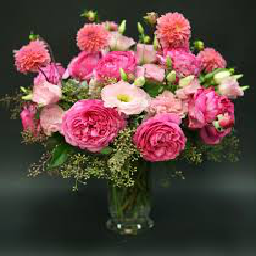

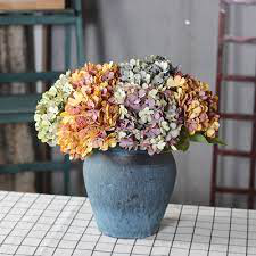

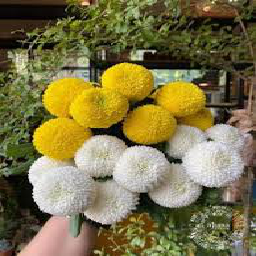

In [134]:
display(img_1)
display(img_2)
display(img_3)

In [135]:
from keras import backend as K

In [136]:
def get_similarity(input_1, input_2):
    # display(input_1)
    # display(input_2)
    y_true = 0.
    input_1 = np.array(input_1)
    input_2 = np.array(input_2)
    
    # input_pair = np.array([img_1, img_2])
    inputs = [np.expand_dims(input_1, axis=0), np.array(np.expand_dims(input_2, axis=0))]
    res = model.predict(inputs, verbose=0)
    
    # print(np.array(K.equal(y_true, K.cast(res < 0.5, float))))
    
    return res[0]
    # model.predict([np.array([input_1])], [np.array([input_2])])
get_similarity(img_1, img_2)

0.16993643

In [137]:
get_similarity(img_1, img_1)

0.13739961

In [138]:
get_similarity(img_2, img_2)

0.18440863

In [139]:
get_similarity(img_2, img_3)

0.28194702

In [140]:
get_similarity(img_1, img_3)

0.26839554